Problem statement:-

Zomato wants to understand how to improve restaurant performance and customer satisfaction across its platform, using existing listing and rating data. The company needs to know:In which cities and cuisine categories it should focus its efforts, based on where most restaurants and orders are concentrated but average ratings remain low.

How much impact online delivery and table‑booking features have on customer engagement and ratings, and what share of partner restaurants have still not adopted these features.

In [2]:
import pandas as pd

df = pd.read_excel("zomato_1.xlsx")
df.head()


,RestaurantID,CountryCode,City,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,...,Rating,Datekey_Opening,Cuisines 1,Cuisines 2,Cuisines 3,Cuisines 4,Cuisines 5,Cuisines 6,Cuisines 7,Cuisines 8
0,18435314,1,New Delhi,Geeta Colony,"Geeta Colony, New Delhi",77.276769,28.650775,North Indian,Indian Rupees(Rs.),No,...,1.0,2013_9_21,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18378015,1,New Delhi,Geeta Colony,"Geeta Colony, New Delhi",77.275052,28.658216,North Indian,Indian Rupees(Rs.),No,...,1.0,2016_9_10,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18424905,1,New Delhi,Lajpat Nagar 1,"Lajpat Nagar 1, New Delhi",77.241312,28.578311,North Indian,Indian Rupees(Rs.),No,...,1.0,2018_9_25,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18180072,1,New Delhi,Mahipalpur,"Mahipalpur, New Delhi",77.123932,28.543587,North Indian,Indian Rupees(Rs.),No,...,1.0,2018_9_6,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18415377,1,New Delhi,Mahipalpur,"Mahipalpur, New Delhi",77.129706,28.541369,North Indian,Indian Rupees(Rs.),No,...,1.0,2013_9_17,North Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape


(9551, 26)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RestaurantID          9551 non-null   int64  
 1   CountryCode           9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   LocalityVerbose       9551 non-null   object 
 5   Longitude             9551 non-null   float64
 6   Latitude              9551 non-null   float64
 7   Cuisines              9542 non-null   object 
 8   Currency              9551 non-null   object 
 9   Has_Table_booking     9551 non-null   object 
 10  Has_Online_delivery   9551 non-null   object 
 11  Is_delivering_now     9551 non-null   object 
 12  Switch_to_order_menu  9551 non-null   object 
 13  Price_range           9551 non-null   int64  
 14  Votes                 9551 non-null   int64  
 15  Average_Cost_for_two 

In [5]:
#Converted Yes/No → 1/0
#Makes data numeric and easier to analyze

In [7]:
yes_no_cols = ['Has_Table_booking','Has_Online_delivery','Is_delivering_now','Switch_to_order_menu']
df[yes_no_cols] = df[yes_no_cols].apply(lambda x: x.map({'Yes':1, 'No':0}))


In [6]:
df.isnull().sum()


RestaurantID               0
CountryCode                0
City                       0
Locality                   0
LocalityVerbose            0
Longitude                  0
Latitude                   0
Cuisines                   9
Currency                   0
Has_Table_booking          0
Has_Online_delivery        0
Is_delivering_now          0
Switch_to_order_menu       0
Price_range                0
Votes                      0
Average_Cost_for_two       0
Rating                     0
Datekey_Opening            0
Cuisines 1                 9
Cuisines 2              3403
Cuisines 3              6847
Cuisines 4              8687
Cuisines 5              9271
Cuisines 6              9435
Cuisines 7              9509
Cuisines 8              9537
dtype: int64

In [ ]:
#Converted date column to datetime
#Essential for time-based analysis

In [7]:
df['Datekey_Opening'] = pd.to_datetime(df['Datekey_Opening'], errors='coerce')


C:\Users\DELL\AppData\Local\Temp\ipykernel_20016\723502373.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datekey_Opening'] = pd.to_datetime(df['Datekey_Opening'], errors='coerce')


In [8]:
#Handled missing cuisine data
#Avoids errors and makes dataset clean

In [9]:
cuisine_cols = ['Cuisines','Cuisines 1','Cuisines 2','Cuisines 3','Cuisines 4','Cuisines 5','Cuisines 6','Cuisines 7','Cuisines 8']
df[cuisine_cols] = df[cuisine_cols].fillna("Unknown")


In [10]:
# Combining all cuisine columns into one clean 'All_Cuisines' column
df['All_Cuisines'] = df[cuisine_cols].apply(
    lambda row: ', '.join([c for c in row if c != "Unknown"]),
    axis=1
)


In [11]:
# Replacing blank combined values with 'Unknown'
df['All_Cuisines'] = df['All_Cuisines'].replace('', 'Unknown')


In [12]:
# Removing any duplicate rows from the dataset
df = df.drop_duplicates()


In [13]:
# Saving the cleaned dataset for SQL and Power BI
df.to_csv("zomato_cleaned.csv", index=False)


In [14]:
df.head()

,RestaurantID,CountryCode,City,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,...,Datekey_Opening,Cuisines 1,Cuisines 2,Cuisines 3,Cuisines 4,Cuisines 5,Cuisines 6,Cuisines 7,Cuisines 8,All_Cuisines
0,18435314,1,New Delhi,Geeta Colony,"Geeta Colony, New Delhi",77.276769,28.650775,North Indian,Indian Rupees(Rs.),No,...,NaT,North Indian,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"North Indian, North Indian"
1,18378015,1,New Delhi,Geeta Colony,"Geeta Colony, New Delhi",77.275052,28.658216,North Indian,Indian Rupees(Rs.),No,...,NaT,North Indian,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"North Indian, North Indian"
2,18424905,1,New Delhi,Lajpat Nagar 1,"Lajpat Nagar 1, New Delhi",77.241312,28.578311,North Indian,Indian Rupees(Rs.),No,...,NaT,North Indian,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"North Indian, North Indian"
3,18180072,1,New Delhi,Mahipalpur,"Mahipalpur, New Delhi",77.123932,28.543587,North Indian,Indian Rupees(Rs.),No,...,NaT,North Indian,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"North Indian, North Indian"
4,18415377,1,New Delhi,Mahipalpur,"Mahipalpur, New Delhi",77.129706,28.541369,North Indian,Indian Rupees(Rs.),No,...,NaT,North Indian,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"North Indian, North Indian"


In [15]:

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("zomato_cleaned.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RestaurantID          9551 non-null   int64  
 1   CountryCode           9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   LocalityVerbose       9551 non-null   object 
 5   Longitude             9551 non-null   float64
 6   Latitude              9551 non-null   float64
 7   Cuisines              9551 non-null   object 
 8   Currency              9551 non-null   object 
 9   Has_Table_booking     9551 non-null   object 
 10  Has_Online_delivery   9551 non-null   object 
 11  Is_delivering_now     9551 non-null   object 
 12  Switch_to_order_menu  9551 non-null   object 
 13  Price_range           9551 non-null   int64  
 14  Votes                 9551 non-null   int64  
 15  Average_Cost_for_two 

,RestaurantID,CountryCode,Longitude,Latitude,Price_range,Votes,Average_Cost_for_two,Rating,Datekey_Opening
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,0.0
mean,9.051128e+06,18.365616,64.126574,25.854381,1.804837,156.909748,1199.210763,2.891268,NaN
std,8.791521e+06,56.750546,41.467058,11.007935,0.905609,430.169145,16121.183073,1.128845,NaN
min,5.300000e+01,1.000000,-157.948486,-41.330428,1.000000,0.000000,0.000000,1.000000,NaN
25%,3.019625e+05,1.000000,77.081343,28.478713,1.000000,5.000000,250.000000,2.500000,NaN
50%,6.004089e+06,1.000000,77.191964,28.570469,2.000000,31.000000,400.000000,3.200000,NaN
75%,1.835229e+07,1.000000,77.282006,28.642758,2.000000,131.000000,700.000000,3.700000,NaN
max,1.850065e+07,216.000000,174.832089,55.976980,4.000000,10934.000000,800000.000000,4.900000,NaN


City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Guwahati          21
Ahmedabad         21
Amritsar          21
Name: RestaurantID, dtype: int64
Locality
Connaught Place        122
Rajouri Garden          99
Shahdara                87
Defence Colony          86
Malviya Nagar           85
Pitampura               85
Mayur Vihar Phase 1     84
Rajinder Nagar          81
Safdarjung              80
Satyaniketan            79
Name: RestaurantID, dtype: int64


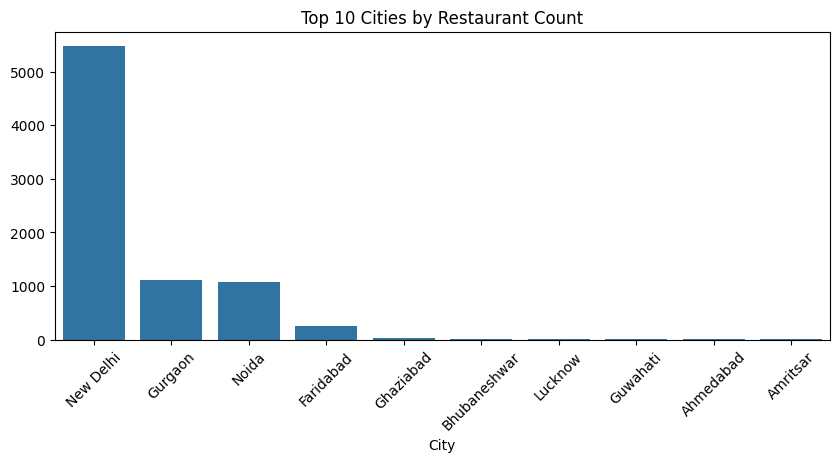

In [16]:
# Check restaurant competition level across top 10 cities
city_comp = (df.groupby("City")["RestaurantID"]
               .count()
               .sort_values(ascending=False)
               .head(10))
print(city_comp)

# Check restaurant competition level across top 10 localities
loc_comp = (df.groupby("Locality")["RestaurantID"]
              .count()
              .sort_values(ascending=False)
              .head(10))
print(loc_comp)

# Visualize competition across top 10 cities
plt.figure(figsize=(10,4))
sns.barplot(x=city_comp.index, y=city_comp.values)
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Restaurant Count")
plt.show()

Price_range
1    2.382426
2    3.070190
3    3.708239
4    3.836689
Name: Rating, dtype: float64
Price_range
1     275.182943
2     596.826213
3    5177.268466
4    1848.523891
Name: Average_Cost_for_two, dtype: float64


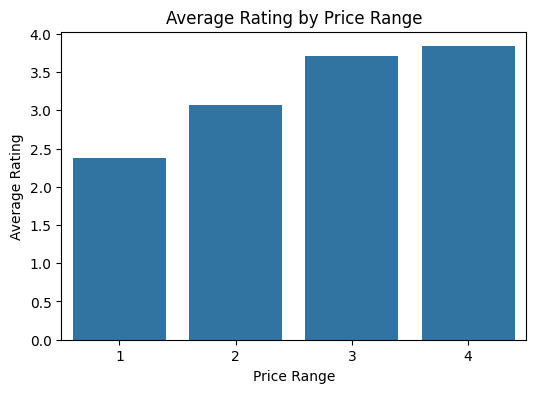

In [17]:
# Understand how customer rating changes across price ranges
price_rating = df.groupby("Price_range")["Rating"].mean().sort_index()
print(price_rating)

# See typical cost for two in each price range
price_cost = df.groupby("Price_range")["Average_Cost_for_two"].mean().sort_index()
print(price_cost)

# Visualize average rating by price range
plt.figure(figsize=(6,4))
sns.barplot(x=price_rating.index, y=price_rating.values)
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.title("Average Rating by Price Range")
plt.show()

In [18]:
# Measure how online delivery and table booking affect rating and votes
service_effect = df.groupby(["Has_Online_delivery", "Has_Table_booking"])[["Rating", "Votes"]].mean()
print(service_effect)

                                         Rating       Votes
Has_Online_delivery Has_Table_booking                      
No                  No                 2.679787  122.025404
                    Yes                3.411618  280.186722
Yes                 No                 3.220585  154.559524
                    Yes                3.600460  474.303448


In [19]:
# Check unique values and dtypes
print(df[["Has_Online_delivery", "Has_Table_booking"]].dtypes)
print(df["Has_Online_delivery"].unique())
print(df["Has_Table_booking"].unique())

Has_Online_delivery    object
Has_Table_booking      object
dtype: object
['No' 'Yes']
['No' 'Yes']


In [20]:
# Recreate Yes/No → 1/0 safely without losing data
yes_no_cols = ["Has_Table_booking", "Has_Online_delivery", "Is_delivering_now", "Switch_to_order_menu"]

for col in yes_no_cols:
    # if original values are 'Yes'/'No', map them; keep others as NaN
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [21]:
print(df[["Has_Online_delivery", "Has_Table_booking"]].dtypes)
print(df["Has_Online_delivery"].unique())
print(df["Has_Table_booking"].unique())

Has_Online_delivery    int64
Has_Table_booking      int64
dtype: object
[0 1]
[0 1]


In [22]:
raw = pd.read_excel("zomato_1.xlsx")   # or restaurant_data_cl.xlsx if that’s your raw file

# Copy the original Yes/No columns back into df
df["Has_Table_booking"]  = raw["Has_Table_booking"]
df["Has_Online_delivery"] = raw["Has_Online_delivery"]
df["Is_delivering_now"]   = raw["Is_delivering_now"]
df["Switch_to_order_menu"] = raw["Switch_to_order_menu"]

# Now safely map Yes/No → 1/0
yes_no_cols = ["Has_Table_booking", "Has_Online_delivery", "Is_delivering_now", "Switch_to_order_menu"]
for col in yes_no_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [23]:
print(df[["Has_Online_delivery", "Has_Table_booking"]].dtypes)
print(df["Has_Online_delivery"].unique())
print(df["Has_Table_booking"].unique())

Has_Online_delivery    int64
Has_Table_booking      int64
dtype: object
[0 1]
[0 1]


In [24]:
# Compare rating and votes for restaurants with/without online delivery
online_effect = df.groupby("Has_Online_delivery")[["Rating", "Votes"]].mean()
print("Online delivery effect:", online_effect)

# Compare rating and votes for restaurants with/without table booking
booking_effect = df.groupby("Has_Table_booking")[["Rating", "Votes"]].mean()
print("Table booking effect:", booking_effect)


Online delivery effect:                        Rating       Votes
Has_Online_delivery                      
0                    2.754310  138.131127
1                    3.288005  211.307222
Table booking effect:                      Rating       Votes
Has_Table_booking                      
0                  2.809687  129.840105
1                  3.482556  353.106218


Key insight from this stepRestaurants with online delivery (1) have clearly 
higher average rating (≈3.29 vs 2.75) and more votes (≈211 vs 138), meaning 
they are more popular and slightly better rated. �Restaurants with table 
booking (1) perform even better: ratings are much higher (≈3.48 vs 2.81) and 
votes are almost 3× higher (≈353 vs 130), showing strong customer engagement 
where booking is available.

Offering online delivery and table booking is strongly associated with higher 
ratings and significantly more customer votes, so Zomato should encourage 
low‑performing restaurants to enable these features.

In [40]:
# Understand which cuisine combinations perform worst/best
cuisine_perf = (df.groupby("All_Cuisines")["Rating"]
                  .agg(["count", "mean"])
                  .query("count >= 30")          # only cuisines with enough data
                  .sort_values("mean"))

print("Lowest-rated cuisines:", cuisine_perf.head(10))
print("Highest-rated cuisines:", cuisine_perf.tail(10))

Lowest-rated cuisines:                                                     count      mean
All_Cuisines                                                       
Biryani, Biryani                                       54  1.972222
North Indian, South Indian, North Indian,  Sout...     35  2.040000
Mughlai, Mughlai                                      103  2.098058
Mithai, Mithai                                         71  2.105634
North Indian, North Indian                            936  2.146688
Raw Meats, Fast Food, Raw Meats,  Fast Food            44  2.220455
Chinese, North Indian, Chinese,  North Indian         105  2.284762
Mithai, Street Food, Mithai,  Street Food             116  2.289655
North Indian, South Indian, Chinese, North Indi...     46  2.313043
North Indian, Chinese, South Indian, North Indi...     34  2.320588
Highest-rated cuisines:                                                     count      mean
All_Cuisines                                                       
N

Key Insight – Cuisine Performance The lowest‑rated cuisine groups are dominated by repeated or generic combinations such as “North Indian, North Indian”, “Mughlai, Mughlai”, and “Biryani, Biryani”, all with average ratings close to or below 2.3 despite having sizable restaurant counts. 
These patterns suggest that duplicate or undifferentiated offerings in popular categories tend to underperform, indicating a need for quality improvement and menu differentiation within these segments. In contrast, the highest‑rated cuisines include focused or premium categories such as “American, American”, “Italian, Italian”, and “Mexican, Mexican”, each achieving average ratings above 3.6 with sufficient sample size. 
This implies that specialized concepts and clearly positioned international cuisines earn stronger customer satisfaction and should be prioritized for visibility and promotions on Zomato.

In [25]:
# Save final cleaned dataset for SQL and Power BI
df.to_csv("zomato_final_cleaned.csv", index=False)

In [26]:
df["Has_Online_delivery"].value_counts()

Has_Online_delivery
0    7100
1    2451
Name: count, dtype: int64

In [28]:
# Rename cuisine columns to use underscores
df = pd.read_csv("zomato_final_cleaned.csv")

rename_cols = {
    "Cuisines 1": "Cuisines_1",
    "Cuisines 2": "Cuisines_2",
    "Cuisines 3": "Cuisines_3",
    "Cuisines 4": "Cuisines_4",
    "Cuisines 5": "Cuisines_5",
    "Cuisines 6": "Cuisines_6",
    "Cuisines 7": "Cuisines_7",
    "Cuisines 8": "Cuisines_8",
}

df = df.rename(columns=rename_cols)

# Save a new file for SQL
df.to_csv("zomato_final_cleaned_sql.csv", index=False)

Solution:-

Most restaurants on Zomato still do not offer online delivery or table booking, even though the analysis shows outlets with these services achieve higher average ratings and significantly more customer engagement (votes). 
Zomato needs to identify non‑adopting restaurants in key cities and design campaigns or incentives to increase activation of online delivery and booking features.


Improve performance in high‑competition cities :-

A small set of cities such as New Delhi, Gurgaon and Noida contribute a very large share of restaurants and cuisines on the platform, but their average ratings remain modest. 
Zomato must help underperforming but high‑volume restaurants in these cities raise service quality, so that customer satisfaction and retention improve in the platform’s most competitive markets.

Optimize cuisine mix and promotions :-

Some cuisine categories (and cuisine combinations) have many restaurants but relatively low average ratings, while other cuisines have fewer outlets yet achieve consistently higher scores. 
Zomato should use cuisine‑level performance insights to: (a) target low‑rated, high‑count cuisines with quality improvement programs, and (b) give more visibility and promotional support to high‑rated cuisines that can attract and retain valuable customers.